## 12. Time Series Models of Heteroscedascity

**Exercise 12.1**.  Display the time sequence plot of the absolute returns for the CREF data.  Repeat the plot with the squared returns. Comment on the volatility patterns observed in these plots.  (The data are in file named `CREF`.)

**Solution**.

In [7]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
Y = np.array(pd.read_csv('../data/CREF.dat')['CREF'])

logY = np.log(Y)
r = logY[1:] - logY[:-1]

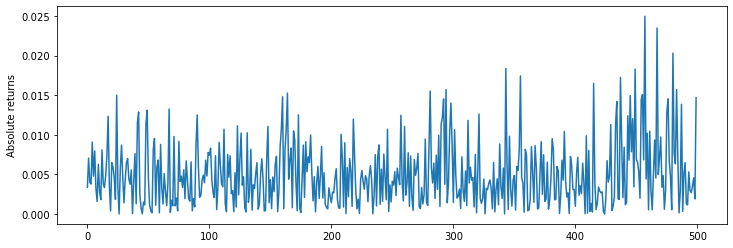

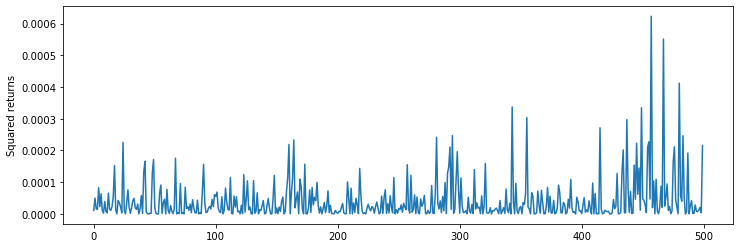

In [12]:
plt.figure(figsize=(12, 4))
plt.plot(np.abs(r))
plt.ylabel('Absolute returns')
plt.show()

plt.figure(figsize=(12, 4))
plt.plot(r**2)
plt.ylabel('Squared returns')
plt.show()

Volatility clustering can be observed in both plots, though it is visually more obvious on the squared returns plot.

**Exercise 12.2**.  Plot the time sequence plot of the absolute returns for the USD/HKD exchange rate data.  Repeat the plot with the squared returns.  Comment on the volatility patterns observed in these plots.  (The data are in the file named `usd.hkd`.)

**Solution**.

In [16]:
r = np.array(pd.read_csv('../data/usd.hkd.dat', sep=' ')['r'])

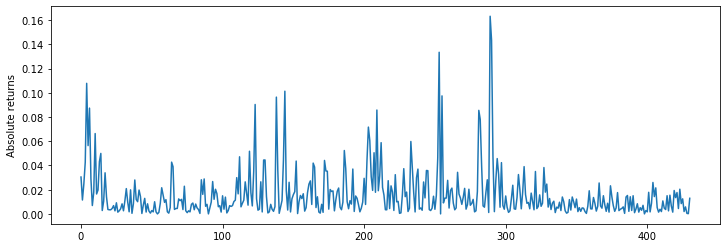

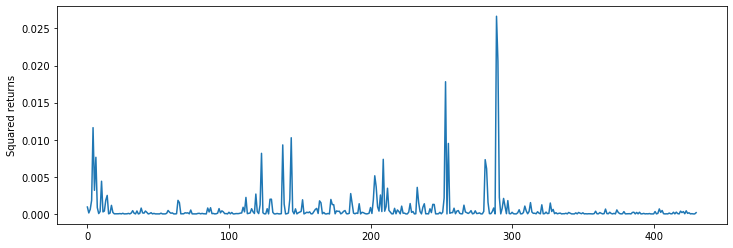

In [17]:
plt.figure(figsize=(12, 4))
plt.plot(np.abs(r))
plt.ylabel('Absolute returns')
plt.show()

plt.figure(figsize=(12, 4))
plt.plot(r**2)
plt.ylabel('Squared returns')
plt.show()

Volatility clustering is evident in both charts.

**Exercise 12.3**.  Use the definition $\eta_t = r_t^2 - \sigma_{t | t - 1}^2$ \[Equation (12.2.4) on page 287\] and show that $\{ \eta_t \}$ is a serially uncorrelated sequence.  Show also that $\eta_t$ is uncorrelated with past squared returns, that is, show that $\text{Corr}[\eta_t, r^2_{t - k}] = 0$ for $k > 0$.

**Solution**.  We have:

$$ 
\begin{align}
\text{E}[\eta_t] &= \text{E}[r_t^2 - \sigma_{t | t-1}^2] \\
&= \text{E}[\sigma_{t | t-1}^2(\varepsilon_t^2 - 1)] \\
&= \text{E}[\text{E}[\sigma_{t | t-1}^2(\varepsilon_t^2 - 1) | r_{t - 1}, r_{t - 2}, \cdots ]] \\
&= \text{E}[\sigma_{t | t-1}^2 \text{E}[\varepsilon_t^2 - 1 | r_{t - 1}, r_{t - 2}, \cdots ]] \\
&= \text{E}[\sigma_{t | t-1}^2 \cdot 0 ] \\
&= 0
\end{align}
$$

and for $k > 0$

$$ 
\begin{align}
\text{E}[\eta_t \eta_{t - k}] &= \text{E}[(r_t^2 - \sigma_{t | t-1}^2)(r_{t-k}^2 - \sigma_{t - k | t-k-1}^2)] \\
&= \text{E}[\sigma_{t | t-1}^2(\varepsilon_t^2 - 1) \cdot (r_{t-k}^2 - \sigma_{t - k | t-k-1}^2)] \\
&= \text{E}[\text{E}[\sigma_{t | t-1}^2 r_{t-k}^2 - \sigma_{t - k | t-k-1}^2) (\varepsilon_t^2 - 1) | r_{t - 1}, r_{t - 2}, \cdots ]] \\
&= \text{E}[\sigma_{t | t-1}^2 r_{t-k}^2 - \sigma_{t - k | t-k-1}^2) \text{E}[\varepsilon_t^2 - 1 | r_{t - 1}, r_{t - 2}, \cdots ]] \\
&= \text{E}[\sigma_{t | t-1}^2 r_{t-k}^2 - \sigma_{t - k | t-k-1}^2) \cdot 0 ] \\
&= 0
\end{align}
$$

Therefore,

$$ \text{Cov}[\eta_t, \eta_{t - k}] = \text{E}[\eta_t \eta_{t - k}] - \text{E}[\eta_t] \text{E}[\eta_{t-k}] = 0 $$

and so the $\{ \eta_t \}$ is serially uncorrelated.

We also have

$$ 
\begin{align}
\text{E}[\eta_t r_{t - k}^2] &= \text{E}[(r_t^2 - \sigma_{t | t-1}^2) r_{t-k}^2] \\
&= \text{E}[\sigma_{t | t-1}^2(\varepsilon_t^2 - 1) \cdot r_{t-k}^2 ] \\
&= \text{E}[\text{E}[\sigma_{t | t-1}^2 r_{t-k}^2 (\varepsilon_t^2 - 1) | r_{t - 1}, r_{t - 2}, \cdots ]] \\
&= \text{E}[\sigma_{t | t-1}^2 r_{t-k}^2 \text{E}[\varepsilon_t^2 - 1 | r_{t - 1}, r_{t - 2}, \cdots ]] \\
&= \text{E}[\sigma_{t | t-1}^2 r_{t-k}^2 \cdot 0 ] \\
&= 0
\end{align}
$$

and so

$$ \text{Cov}[\eta_t, r_{t - k}^2] = \text{E}[\eta_t r_{t - k}^2] - \text{E}[\eta_t] \text{E}[r_{t-k}^2] = 0 $$

which is the desired result.

**Exercise 12.4**.  Substituting $\sigma_{t | t - 1}^2 = r_t^2 - \eta_t$ into Equation (12.2.2) on page 285 show the algebra that leads to Equation (12.2.5) on page 287.